In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot

# Exploring Data


In [3]:
#Dimensions of data
data = pd.read_csv("C:\\Users\\Ashish\\Desktop\\ML\\PimaIndianDiabetes\\pima-indians-diabetes-database\\diabetes.csv")
pd.set_option('display.width', 500)
pd.set_option('precision', 3)
print(data.head(5))
print("Number of Rows and Columns:",data.shape)
print("Data type of each column:\n",data.dtypes)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72             35        0  33.6                     0.627   50        1
1            1       85             66             29        0  26.6                     0.351   31        0
2            8      183             64              0        0  23.3                     0.672   32        1
3            1       89             66             23       94  28.1                     0.167   21        0
4            0      137             40             35      168  43.1                     2.288   33        1
Number of Rows and Columns: (768, 9)
Data type of each column:
 Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           

# Descriptive stats about data

In [4]:
#Descriptive stats of data
print("DESCRIPTION")
pd.set_option('display.width', 100)
pd.set_option('precision', 3)
description = data.describe()
print(description)
print("------------------------------------------")

#Types of classes
print("CATEGORY VARIABLE CLASS COUNT")
class_counts = data.groupby('Outcome').size()
print("0 = Non Diabetic\n1 = Diabetic",class_counts)
print("------------------------------------------")

#Correlation between attributes
print("CORRELATIONS")
correlations = data.corr(method='pearson')
print(correlations)
print("------------------------------------------")

#Skew of attributes
print("SKEW")
skew = data.skew()
print(skew)

DESCRIPTION
       Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin      BMI  \
count      768.000  768.000        768.000        768.000  768.000  768.000   
mean         3.845  120.895         69.105         20.536   79.799   31.993   
std          3.370   31.973         19.356         15.952  115.244    7.884   
min          0.000    0.000          0.000          0.000    0.000    0.000   
25%          1.000   99.000         62.000          0.000    0.000   27.300   
50%          3.000  117.000         72.000         23.000   30.500   32.000   
75%          6.000  140.250         80.000         32.000  127.250   36.600   
max         17.000  199.000        122.000         99.000  846.000   67.100   

       DiabetesPedigreeFunction      Age  Outcome  
count                   768.000  768.000  768.000  
mean                      0.472   33.241    0.349  
std                       0.331   11.760    0.477  
min                       0.078   21.000    0.000  
25%             

# Visualization of Data

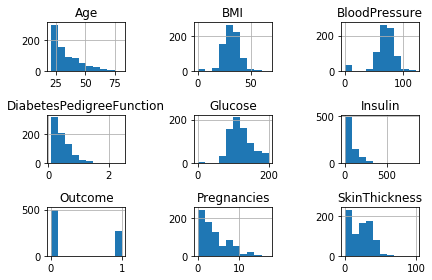

------------------------------------------


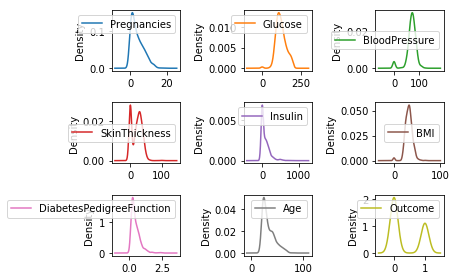

------------------------------------------


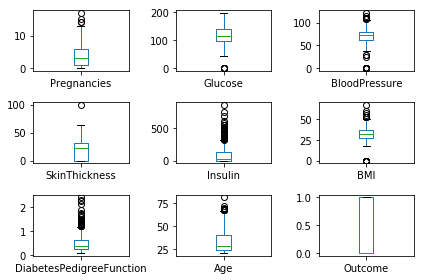

------------------------------------------


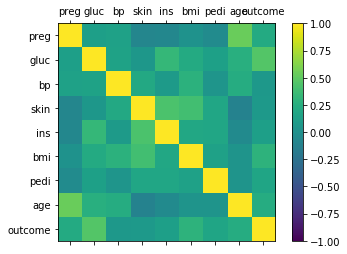

------------------------------------------


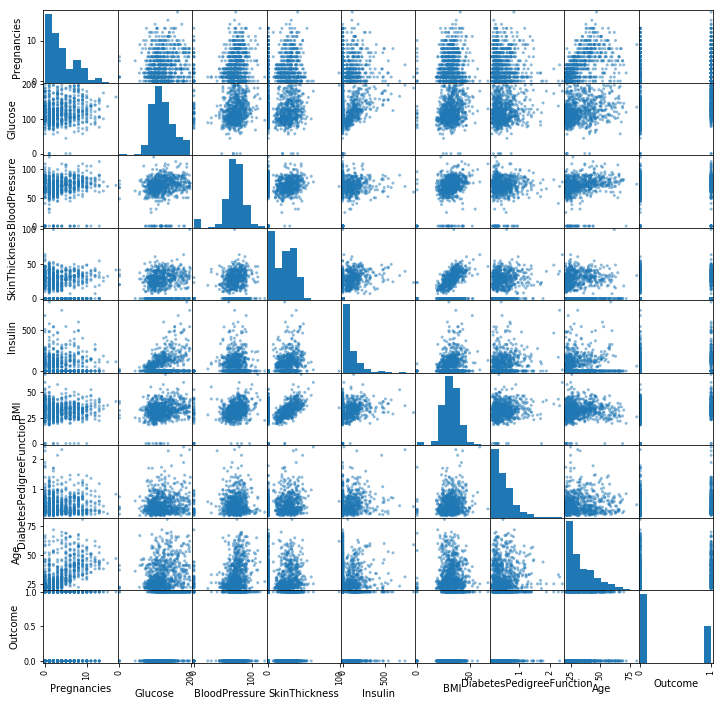

In [5]:
#Visualization of descriptive stats
#Histograms
data.hist()
pyplot.tight_layout()
pyplot.show()
print("------------------------------------------")

#Density plots
data.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
pyplot.tight_layout()
pyplot.show()
print("------------------------------------------")

#Boxplots
data.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
pyplot.tight_layout()
pyplot.show()
print("------------------------------------------")

#Correlation Matrix Plots
names = ['preg', 'gluc', 'bp', 'skin', 'ins', 'bmi', 'pedi', 'age', 'outcome']
correlations = data.corr()
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1) #Generates array between 0 and 9 with difference as 1
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
pyplot.show()
print("------------------------------------------")

#Scatter Plot Matrix
pd.plotting.scatter_matrix(data, figsize=(12,12))
pyplot.show()

# Data Preprocessing
* Rescaling
* Standardizing
* Normalizing
* Binarize

## Rescale
> When your data is comprised of attributes with varying scales, many machine learning algorithms can beneﬁt from rescaling the attributes to all have the same scale. Often this is referred to as normalization and attributes are often rescaled into the range between 0 and 1. This is useful for optimization algorithms used in the core of machine learning algorithms like gradient descent. It is also useful for algorithms that weight inputs like regression and neural networks and algorithms that use distance measures like k-Nearest Neighbors

In [21]:
from sklearn.preprocessing import MinMaxScaler
from numpy import set_printoptions
import pandas as pd

name = ['preg', 'gluc', 'bp', 'skin', 'ins', 'bmi', 'pedi', 'age', 'outcome']
data = pd.read_csv("C:\\Users\\Ashish\\Desktop\\ML\\PimaIndianDiabetes\\pima-indians-diabetes-database\\diabetes.csv", names = name, header = 0)

#Divide array into input and output components
array = data.values
x = array[:,0:8]
y = array[:,8]
scaler =  MinMaxScaler(feature_range = (0,1))
rescaledX = scaler.fit_transform(x)

#Summarize transformed data
set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[0.353 0.744 0.59  0.354 0.    0.501 0.234 0.483]
 [0.059 0.427 0.541 0.293 0.    0.396 0.117 0.167]
 [0.471 0.92  0.525 0.    0.    0.347 0.254 0.183]
 [0.059 0.447 0.541 0.232 0.111 0.419 0.038 0.   ]
 [0.    0.688 0.328 0.354 0.199 0.642 0.944 0.2  ]]


## Standardize
>Standardization is a useful technique to transform attributes with a Gaussian distribution and diﬀering means and standard deviations to a standard Gaussian distribution with a mean of 0 and a standard deviation of 1. It is most suitable for techniques that assume a Gaussian distribution in the input variables and work better with rescaled data, such as linear regression, logistic regression and linear discriminate analysis (Gaussian Distribution = Normal Distribution)

In [33]:
from sklearn.preprocessing import StandardScaler
from numpy import set_printoptions
import pandas as pd

name = ['preg', 'gluc', 'bp', 'skin', 'ins', 'bmi', 'pedi', 'age', 'outcome']
data = pd.read_csv("C:\\Users\\Ashish\\Desktop\\ML\\PimaIndianDiabetes\\pima-indians-diabetes-database\\diabetes.csv", names = name, header = 0)

#Divide array into input and output components
array = data.values
x = array[:,0:8]
y = array[:,8]
standardiser = StandardScaler().fit(x)
rescaledX = standardiser.transform(x)

#Summarize transformed Data
set_printoptions(precision=3)
print(rescaledX[0:5,:])


[[ 0.64   0.848  0.15   0.907 -0.693  0.204  0.468  1.426]
 [-0.845 -1.123 -0.161  0.531 -0.693 -0.684 -0.365 -0.191]
 [ 1.234  1.944 -0.264 -1.288 -0.693 -1.103  0.604 -0.106]
 [-0.845 -0.998 -0.161  0.155  0.123 -0.494 -0.921 -1.042]
 [-1.142  0.504 -1.505  0.907  0.766  1.41   5.485 -0.02 ]]


## Normalize 
> Normalizing in scikit-learn refers to rescaling each observation (row) to have a length of 1 (called a unit norm or a vector with the length of 1 in linear algebra). This pre-processing method can be useful for sparse datasets (lots of zeros) with attributes of varying scales when using algorithms that weight input values such as neural networks and algorithms that use distance measures such as k-Nearest Neighbors
* Rescales data to unit norm (Square of values of row will be one)

In [34]:
from sklearn.preprocessing import Normalizer
from numpy import set_printoptions
import pandas as pd

name = ['preg', 'gluc', 'bp', 'skin', 'ins', 'bmi', 'pedi', 'age', 'outcome']
data = pd.read_csv("C:\\Users\\Ashish\\Desktop\\ML\\PimaIndianDiabetes\\pima-indians-diabetes-database\\diabetes.csv", names = name, header = 0)

#Divide array into input and output components
array = data.values
x = array[:,0:8]
y = array[:,8]
normalizer = Normalizer().fit(x)
normalizedX = normalizer.transform(x)

#Summarize transformed Data
set_printoptions(precision=3)
print(normalizedX[0:5,:])

[[0.034 0.828 0.403 0.196 0.    0.188 0.004 0.28 ]
 [0.008 0.716 0.556 0.244 0.    0.224 0.003 0.261]
 [0.04  0.924 0.323 0.    0.    0.118 0.003 0.162]
 [0.007 0.588 0.436 0.152 0.622 0.186 0.001 0.139]
 [0.    0.596 0.174 0.152 0.731 0.188 0.01  0.144]]


## Binarize 
> You can transform your data using a binary threshold. All values above the threshold are marked 1 and all equal to or below are marked as 0. This is called binarizing your data or thresholding your data. It can be useful when you have probabilities that you want to make crisp values. It is also useful when feature engineering and you want to add new features that indicate something meaningful.

In [36]:
from sklearn.preprocessing import Binarizer
from numpy import set_printoptions
import pandas as pd

name = ['preg', 'gluc', 'bp', 'skin', 'ins', 'bmi', 'pedi', 'age', 'outcome']
data = pd.read_csv("C:\\Users\\Ashish\\Desktop\\ML\\PimaIndianDiabetes\\pima-indians-diabetes-database\\diabetes.csv", names = name, header = 0)

#Divide array into input and output components
array = data.values
x = array[:,0:8]
y = array[:,8]
binarizer = Binarizer().fit(x)
binarizedX = binarizer.transform(x)

#Summarize transformed Data
set_printoptions(precision=3)
print(binarizedX[0:5,:])

[[1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 0. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1.]]


# Feature Selection of Data
>Feature selection is a process where you automatically select those features in your data that contribute most to the prediction variable or output in which you are interested. Having irrelevant features in your data can decrease the accuracy of many models, especially linear algorithms like linear and logistic regression. Three beneﬁts of performing feature selection before modeling your data are:
* Reduces Overfitting 
* Improves Accuracy
* Reduces Training Time


## Univariate Selection
> Statistical tests can be used to select those features that have the strongest relationship with the output variable. The scikit-learn library provides the SelectKBest class2 that can be used with a suite of diﬀerent statistical tests to select a speciﬁc number of features. The example below uses the chi-squared (chi2) statistical test for non-negative features to select 4 of the best features from the Pima Indians onset of diabetes dataset.

* Here we select 4 features based on their chi-squared statistical test


In [40]:
import pandas as pd
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

name = ['preg', 'gluc', 'bp', 'skin', 'ins', 'bmi', 'pedi', 'age', 'outcome']
data = pd.read_csv("C:\\Users\\Ashish\\Desktop\\ML\\PimaIndianDiabetes\\pima-indians-diabetes-database\\diabetes.csv", names = name, header = 0)
#Divide array into input and output components
array = data.values
x = array[:,0:8]
y = array[:,8]

#Feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(x,y)

#Summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(x)

#Summarize selected features
print(features[0:5,:])

[ 111.52  1411.887   17.605   53.108 2175.565  127.669    5.393  181.304]
[[148.    0.   33.6  50. ]
 [ 85.    0.   26.6  31. ]
 [183.    0.   23.3  32. ]
 [ 89.   94.   28.1  21. ]
 [137.  168.   43.1  33. ]]


## Recursive Feature Elimination
> The Recursive Feature Elimination (or RFE) works by recursively removing attributes and building a model on those attributes that remain. It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute. You can learn more about the RFE class3 in the scikit-learn documentation. The example below uses RFE with the logistic regression algorithm to select the top 3 features. The choice of algorithm does not matter too much as long as it is skillful and consistent

* Here we select 3 top features based on recursive elimination

In [47]:
import pandas as pd
from numpy import set_printoptions
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

name = ['preg', 'gluc', 'bp', 'skin', 'ins', 'bmi', 'pedi', 'age', 'outcome']
data = pd.read_csv("C:\\Users\\Ashish\\Desktop\\ML\\PimaIndianDiabetes\\pima-indians-diabetes-database\\diabetes.csv", names = name, header = 0)
#Divide array into input and output components
array = data.values
x = array[:,0:8]
y = array[:,8]

#Feature Extraction
model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(x,y)

print("Num Features:",fit.n_features_)
print("Selected Features:",fit.support_ )
print("Feature Ranking:",fit.ranking_)

Num Features: 3
Selected Features: [ True False False False False  True  True False]
Feature Ranking: [1 2 3 5 6 1 1 4]


## PCA 
> Principal Component Analysis (or PCA) uses linear algebra to transform the dataset into a compressed form. Generally this is called a data reduction technique. A property of PCA is that you can choose the number of dimensions or principal components in the transformed result. In the example below, we use PCA and select 3 principal components

In [50]:
import pandas as pd
from sklearn.decomposition import PCA

name = ['preg', 'gluc', 'bp', 'skin', 'ins', 'bmi', 'pedi', 'age', 'outcome']
data = pd.read_csv("C:\\Users\\Ashish\\Desktop\\ML\\PimaIndianDiabetes\\pima-indians-diabetes-database\\diabetes.csv", names = name, header = 0)
#Divide array into input and output components
array = data.values
x = array[:,0:8]
y = array[:,8]

# Feature Extraction 
pca = PCA(n_components = 3)
fit = pca.fit(x)

#Summarize components
print("Explained Variance:",fit.explained_variance_ratio_)
print(fit.components_)

Explained Variance: [0.889 0.062 0.026]
[[-2.022e-03  9.781e-02  1.609e-02  6.076e-02  9.931e-01  1.401e-02
   5.372e-04 -3.565e-03]
 [-2.265e-02 -9.722e-01 -1.419e-01  5.786e-02  9.463e-02 -4.697e-02
  -8.168e-04 -1.402e-01]
 [-2.246e-02  1.434e-01 -9.225e-01 -3.070e-01  2.098e-02 -1.324e-01
  -6.400e-04 -1.255e-01]]


## Feature Importance
> Bagged decision trees like Random Forest and Extra Trees can be used to estimate the importance of features. In the example below we construct a ExtraTreesClassifier classiﬁer for the Pima Indians onset of diabetes dataset.

* In the output we can see scores for each feature, the higher the score the more important an attribute

In [52]:
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier

name = ['preg', 'gluc', 'bp', 'skin', 'ins', 'bmi', 'pedi', 'age', 'outcome']
data = pd.read_csv("C:\\Users\\Ashish\\Desktop\\ML\\PimaIndianDiabetes\\pima-indians-diabetes-database\\diabetes.csv", names = name, header = 0)
#Divide array into input and output components
array = data.values
x = array[:,0:8]
y = array[:,8]

#Feature Extraction
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)


[0.103 0.232 0.105 0.078 0.082 0.125 0.132 0.142]


  # Evaluate Machine Learning Algorithms
  > Imagine an algorithm that remembers every observation it is shown during training. If you evaluated your machine learning algorithm on the same dataset used to train the algorithm, then an algorithm like this would have a perfect score on the training dataset. But the predictions it made on new data would be terrible. We must evaluate our machine learning algorithms on data that is not used to train the algorithm. Here are 4 different techniques to split the training dataset to create useful estimates of performance of our machine learning algorithms. 
* Train and Test Sets
* k-Fold Cross Validation
* Leave one out Cross Validation
* Repeated Random Test-Train test splits

### What techniques to use when? 
* Generally k-fold cross validation is the gold standard for evaluating the performance of a machine learning algorithm on unseen data with k set to 3, 5, or 10.

* Using a train/test split is good for speed when using a slow algorithm and produces performance estimates with lower bias when using large datasets.

* Techniques like leave-one-out cross validation and repeated random splits can be useful intermediates when trying to balance variance in the estimated performance, model training speed and dataset size.

>The best advice is to experiment and ﬁnd a technique for your problem that is fast and produces reasonable estimates of performance that you can use to make decisions. If in doubt, use 10-fold cross validation.


## Train and Test Sets
> Used for large datasets having millions of records. Basically divides the dataset into two parts train and test. The split depends on the size of the data. Common practice is to take 67% data to train and 33% to test. The evaluation technique for this algorithm is fast, hence it is mostly used for large datasets when we are sure that both splits of data represent the underlying problem. Useful to use when the algorithm you are investigating is slow to train. Downside of this technique is that it has high variance. Differences in test and training set can result in meaningful differences in estimate of accuracy. 

* In the example below we split the Pima Indians dataset into 67%/33% splits for training and test and evaluate the accuracy of a Logistic Regression model.

In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

name = ['preg', 'gluc', 'bp', 'skin', 'ins', 'bmi', 'pedi', 'age', 'outcome']
data = pd.read_csv("C:\\Users\\Ashish\\Desktop\\ML\\PimaIndianDiabetes\\pima-indians-diabetes-database\\diabetes.csv", names = name, header = 0)
#Divide array into input and output components
array = data.values
x = array[:,0:8]
y = array[:,8]
test_size = 0.33
seed = 7
X_Train, X_Test, Y_Train, Y_Test = train_test_split(x, y, test_size=test_size, random_state = seed )
model = LogisticRegression()
model.fit(X_Train, Y_Train)
result = model.score(X_Test, Y_Test)
print("Accuracy:", result*100)

Accuracy: 75.59055118110236


## k-Fold Cross Validation
> Better than train test split as it has lesser varianc. It works by splitting datasets into k parts, where algorithm is trained on (k-1) parts and one part is held back for testing. Each split is called  a fold. The process is repeated k-1 times so that each time we test on a different fold therefore reducing variance. For modest dataset with thousands or ten thousand records folds of 3,5,10 are standard. 
 *  In the example below we use 10-fold cross validation   
 
>You can see that we report both the mean and the standard deviation of the performance measure. When summarizing performance measures, it is a good practice to summarize the distribution of the measures, in this case assuming a Gaussian distribution of performance (a very reasonable assumption) and recording the mean and standard deviation

In [54]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

name = ['preg', 'gluc', 'bp', 'skin', 'ins', 'bmi', 'pedi', 'age', 'outcome']
data = pd.read_csv("C:\\Users\\Ashish\\Desktop\\ML\\PimaIndianDiabetes\\pima-indians-diabetes-database\\diabetes.csv", names = name, header = 0)
#Divide array into input and output components
array = data.values
x = array[:,0:8]
y = array[:,8]
num_folds = 10 
seed = 7
kfold = KFold(n_splits= num_folds, random_state= seed)
model = LogisticRegression()
results = cross_val_score(model, x, y, cv = kfold)
print("Accuracy(Results Mean):", results.mean()*100)
print("Accuracy(Results Std Deviation):", results.std()*100)

Accuracy(Results Mean): 76.95146958304852
Accuracy(Results Std Deviation): 4.841051924567195


## Leave one out cross validation
> Cross-validation provides one method for estimating generalization errors. The approach centers around splitting the training data available into two sets, a cross-validation training set and cross-validation test set. The first of these is used for training a regression model. Its accuracy on the test set then provides a generalization error estimate. Here, we focus on a special form of cross-validation, called leave-one-out cross-validation (LOOCV). In this case, we pick only one point as the test set. We then build a model on all the remaining, complementary points, and evaluate its error on the single-point held out. A generalization error estimate is obtained by repeating this procedure for each of the training points available, averaging the results. 
LOOCV can be computationally expensive because it generally requires one to construct many models — equal in number to the size of the training set.

* You can see in the standard deviation that the score has more variance than the k-fold cross validation results described above.


In [55]:
import pandas as pd
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

name = ['preg', 'gluc', 'bp', 'skin', 'ins', 'bmi', 'pedi', 'age', 'outcome']
data = pd.read_csv("C:\\Users\\Ashish\\Desktop\\ML\\PimaIndianDiabetes\\pima-indians-diabetes-database\\diabetes.csv", names = name, header = 0)
#Divide array into input and output components
array = data.values
x = array[:,0:8]
y = array[:,8]
num_folds = 10 

loocv = LeaveOneOut()
model = LogisticRegression()
results = cross_val_score(model, x, y, cv = loocv)
print("Accuracy(Mean):",results.mean()*100)
print("Accuracy(Std Deviation):", results.std()*100)

Accuracy(Mean): 76.953125
Accuracy(Std Deviation): 42.11328831538063


## Repeated Random Test-Train splits
> Another variation on k-fold cross validation is to create a random split of the data like the train/test split described above, but repeat the process of splitting and evaluation of the algorithm multiple times, like cross validation. This has the speed of using a train/test split and the reduction in variance in the estimated performance of k-fold cross validation. You can also repeat the process many more times as needed to improve the accuracy. A down side is that repetitions may include much of the same data in the train or the test split from run to run, introducing redundancy into the evaluation. The example below splits the data into a 67%/33% train/test split and repeats the process 10 times.

* Makes use of fast run time of train test split and less variance of k-fold


In [56]:
import pandas as pd
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

name = ['preg', 'gluc', 'bp', 'skin', 'ins', 'bmi', 'pedi', 'age', 'outcome']
data = pd.read_csv("C:\\Users\\Ashish\\Desktop\\ML\\PimaIndianDiabetes\\pima-indians-diabetes-database\\diabetes.csv", names = name, header = 0)
#Divide array into input and output components
array = data.values
x = array[:,0:8]
y = array[:,8]
n_splits = 10 
test_size = 0.33
seed = 7
kfold = ShuffleSplit(n_splits = n_splits, test_size = test_size, random_state = seed)
model = LogisticRegression()
results = cross_val_score(model, x, y, cv = kfold)
print("Accuracy(Mean):",results.mean()*100)
print("Accuracy(Std Deviation):", results.std()*100)

Accuracy(Mean): 76.49606299212599
Accuracy(Std Deviation): 1.6983980007970874


# Evaluate Machine Learning Performance Metrics
